# Lead Scoring Case Study

In [1]:
#Importing libraries 

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from statsmodels import graphics 
from sklearn import metrics
from scipy import stats
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFE
from sklearn.metrics import confusion_matrix
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [3]:
# Suppress warnings
import warnings
warnings.filterwarnings("ignore")

## Customize global behaviour of dataframe

In [4]:
pd.set_option("display.max_columns",None,"display.max_rows",None)

In [5]:
# Setting plot style
plt.style.use("seaborn-dark")

## Loading and examining data

In [6]:
leads = pd.read_csv("Leads.csv")
leads.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,Specialization,How did you hear about X Education,What is your current occupation,What matters most to you in choosing a course,Search,Magazine,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Tags,Lead Quality,Update me on Supply Chain Content,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,Page Visited on Website,NaN,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Interested in other courses,Low in Relevance,No,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,Email Opened,India,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,NaN,No,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,Email Opened,India,Business Administration,Select,Student,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,Unreachable,India,Media and Advertising,Word Of Mouth,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,Not Sure,No,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,Converted to Lead,India,Select,Other,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


### Basic metadata check of dataset
- Shape
- Information
- Descriptive statistics


In [7]:
# Shape of dataset
leads.shape

(9240, 37)

In [8]:
# Information of dataset
leads.info(verbose = True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Number                                    9240 non-null   int64  
 2   Lead Origin                                    9240 non-null   object 
 3   Lead Source                                    9204 non-null   object 
 4   Do Not Email                                   9240 non-null   object 
 5   Do Not Call                                    9240 non-null   object 
 6   Converted                                      9240 non-null   int64  
 7   TotalVisits                                    9103 non-null   float64
 8   Total Time Spent on Website                    9240 non-null   int64  
 9   Page Views Per Visit                           9103 

In [9]:
# Descriptive statistics of dataset
leads.describe()

,Lead Number,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Asymmetrique Activity Score,Asymmetrique Profile Score
count,9240.000000,9240.000000,9103.000000,9240.000000,9103.000000,5022.000000,5022.000000
mean,617188.435606,0.385390,3.445238,487.698268,2.362820,14.306252,16.344883
std,23405.995698,0.486714,4.854853,548.021466,2.161418,1.386694,1.811395
min,579533.000000,0.000000,0.000000,0.000000,0.000000,7.000000,11.000000
25%,596484.500000,0.000000,1.000000,12.000000,1.000000,14.000000,15.000000
50%,615479.000000,0.000000,3.000000,248.000000,2.000000,14.000000,16.000000
75%,637387.250000,1.000000,5.000000,936.000000,3.000000,15.000000,18.000000
max,660737.000000,1.000000,251.000000,2272.000000,55.000000,18.000000,20.000000


## Data Wrangling
- Identifying gaps in data and either filling or deleting them.
- Deleting data that's either unnecessary or irrelevant. 
- Identifying extreme outliers in data and either explaining the discrepancies or removing them. 

### Checking for duplicate values

In [10]:
# Checking for duplicate values in "PROSPECT ID"
leads["Prospect ID"].duplicated().sum() == 0

True

In [11]:
# Checking for duplicate values in "Lead Number"
leads["Lead Number"].duplicated().sum() == 0

True

In [12]:
# Dropping Prospect ID
leads.drop("Prospect ID", axis = 1, inplace = True)

### Checking for null values

In [13]:
(leads.isnull().sum()/leads.shape[0]*100).sort_values(ascending = False)

Lead Quality                                     51.590909
Asymmetrique Activity Index                      45.649351
Asymmetrique Profile Index                       45.649351
Asymmetrique Profile Score                       45.649351
Asymmetrique Activity Score                      45.649351
Tags                                             36.287879
Lead Profile                                     29.318182
What matters most to you in choosing a course    29.318182
What is your current occupation                  29.112554
Country                                          26.634199
How did you hear about X Education               23.885281
Specialization                                   15.562771
City                                             15.367965
Page Views Per Visit                              1.482684
TotalVisits                                       1.482684
Last Activity                                     1.114719
Lead Source                                       0.3896

### Handling null values & discrepancies

In [14]:
# "Select" value in all columns is equated to null, hence replacing it with NaN. 
leads = leads.replace(["Select","select"], np.NaN)

In [15]:
(leads.isnull().sum()/leads.shape[0]*100).sort_values(ascending = False)

How did you hear about X Education               78.463203
Lead Profile                                     74.188312
Lead Quality                                     51.590909
Asymmetrique Activity Index                      45.649351
Asymmetrique Profile Score                       45.649351
Asymmetrique Profile Index                       45.649351
Asymmetrique Activity Score                      45.649351
City                                             39.707792
Specialization                                   36.580087
Tags                                             36.287879
What matters most to you in choosing a course    29.318182
What is your current occupation                  29.112554
Country                                          26.634199
Page Views Per Visit                              1.482684
TotalVisits                                       1.482684
Last Activity                                     1.114719
Lead Source                                       0.3896

#### 1. Dropping columns with null value percentage more than or equal to 39%

In [16]:
# Abiding by the industry norms, columns which have null value percentage more than 39% can be dropped
leads = leads.loc[:,(leads.isnull().sum()/leads.shape[0]*100) <= 39]

In [17]:
(leads.isnull().sum()/leads.shape[0]*100).sort_values(ascending = False)

Specialization                                   36.580087
Tags                                             36.287879
What matters most to you in choosing a course    29.318182
What is your current occupation                  29.112554
Country                                          26.634199
TotalVisits                                       1.482684
Page Views Per Visit                              1.482684
Last Activity                                     1.114719
Lead Source                                       0.389610
Through Recommendations                           0.000000
Receive More Updates About Our Courses            0.000000
Lead Number                                       0.000000
Newspaper                                         0.000000
Update me on Supply Chain Content                 0.000000
Get updates on DM Content                         0.000000
I agree to pay the amount through cheque          0.000000
A free copy of Mastering The Interview            0.0000

#### 2. Imputation of null values

In [18]:
# Displaying only those columns holding null values 
(leads.isnull().sum()/leads.shape[0]*100)[(leads.isnull().sum()/leads.shape[0]*100) > 0.00]

Lead Source                                       0.389610
TotalVisits                                       1.482684
Page Views Per Visit                              1.482684
Last Activity                                     1.114719
Country                                          26.634199
Specialization                                   36.580087
What is your current occupation                  29.112554
What matters most to you in choosing a course    29.318182
Tags                                             36.287879
dtype: float64

In [19]:
# Replacing NaNs in categorical columns with "Missing"

cat_null_cols = ["Specialization", "Tags", "What matters most to you in choosing a course", 
                 "What is your current occupation","Country","Last Activity","Lead Source"]

for col in cat_null_cols:
    leads[col].replace(np.NaN, "Missing_{}".format(col), inplace = True)

In [20]:
(leads.isnull().sum()/leads.shape[0]*100)[(leads.isnull().sum()/leads.shape[0]*100) > 0.00]

TotalVisits             1.482684
Page Views Per Visit    1.482684
dtype: float64

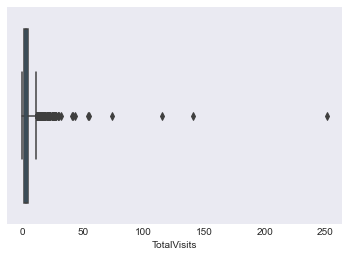

In [21]:
# Handling numeric columns holding null values

sns.boxplot(leads["TotalVisits"])
plt.show()

In [22]:
# Imputing null values with median, as the column contains outliers

leads["TotalVisits"].fillna(leads["TotalVisits"].median(), inplace = True)

##### 2.1 Outlier treatment of TotalVisits

In [23]:
# Handling outliers

leads["TotalVisits"].describe(percentiles = [0.9,0.95,0.99,0.995,0.999])

count    9240.000000
mean        3.438636
std         4.819024
min         0.000000
50%         3.000000
90%         7.000000
95%        10.000000
99%        17.000000
99.5%      20.805000
99.9%      31.522000
max       251.000000
Name: TotalVisits, dtype: float64

In [24]:
# The above descriptive statistics shows the total visits count increasing drastically from 99.9% to 100%. 
# Therefore, it is considered to be an outlier and needs to be handled. 

leads.TotalVisits[leads["TotalVisits"] > 21] = 21

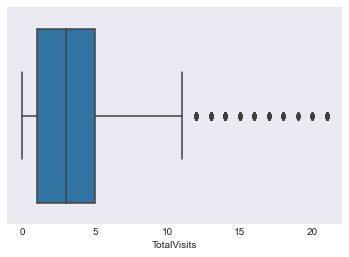

In [25]:
# Boxplot after removing outliers
sns.boxplot(leads["TotalVisits"])
plt.show()

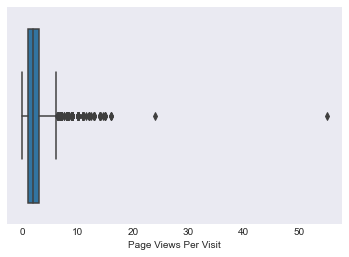

In [26]:
# Handling "Page Views Per Visit" column

sns.boxplot(leads["Page Views Per Visit"])
plt.show()

In [27]:
# Imputing NaNs with median, as the column contains null values.
leads["Page Views Per Visit"].fillna(leads["Page Views Per Visit"].median(), inplace = True)

##### 2.2 Outlier treatment of "Page Views Per Visit"

In [28]:
leads["Page Views Per Visit"].describe(percentiles = [0.9,0.95,0.99,0.995,0.999])

count    9240.000000
mean        2.357440
std         2.145781
min         0.000000
50%         2.000000
90%         5.000000
95%         6.000000
99%         9.000000
99.5%      11.000000
99.9%      14.380500
max        55.000000
Name: Page Views Per Visit, dtype: float64

In [29]:
# The above descriptive statistics displays the unusual increase in the Page Views Per Visit count from 99.9% to 100%.
# It is considered to be an outlier and needs to be handled

leads["Page Views Per Visit"][leads["Page Views Per Visit"] > 15] = 15

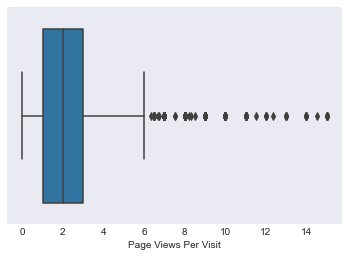

In [30]:
# Boxplot after removing outliers
sns.boxplot(leads["Page Views Per Visit"])
plt.show()

### Scrubbing inessential columns

In [31]:
# Listing categorical columns from dataset
cat_cols = leads.columns[leads.dtypes == "object"]

In [32]:
# Dropping columns from dataset which includes only one category, as it won't interpret significant information.
for col in cat_cols:
    if len(leads[col].unique()) == 1:
        leads.drop(col, axis = 1, inplace = True)

### Analysis of numerical columns

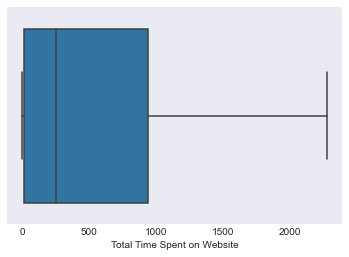

In [33]:
sns.boxplot(leads["Total Time Spent on Website"])
plt.show()

### Inferences:
- No visible outliers.

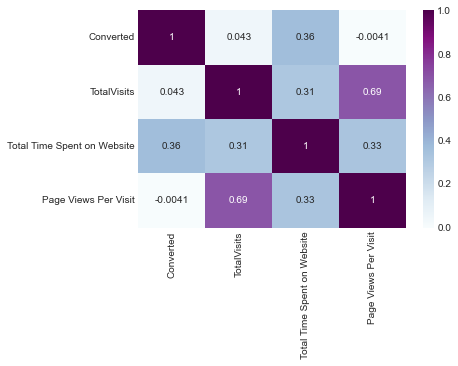

In [34]:
sns.heatmap(leads[["Converted","TotalVisits","Total Time Spent on Website","Page Views Per Visit"]].corr(),annot = True, 
            cmap = "BuPu")
plt.show()

### Inferences:
- Positive correlation observed in TotalVisits and Page Views Per Visit. 

### Bivariate analysis of categorical columns

In [35]:
# User-defined function for plotting categorical columns with respect to target feature
def cat_col_plot(col,rot):
    plt.figure(figsize = (10,5))
    ax = sns.countplot(col, hue = "Converted", data = leads, palette = ["crimson","midnightblue"])
    plt.xticks(rotation = rot)
    for bar in ax.patches:
        ax.annotate(format(bar.get_height(),"0.0f"), (bar.get_x() + bar.get_width() / 2, bar.get_height()), 
                    ha="center",va="center", size = 10, xytext = (0, 5), textcoords = "offset points")
    
    plt.show()

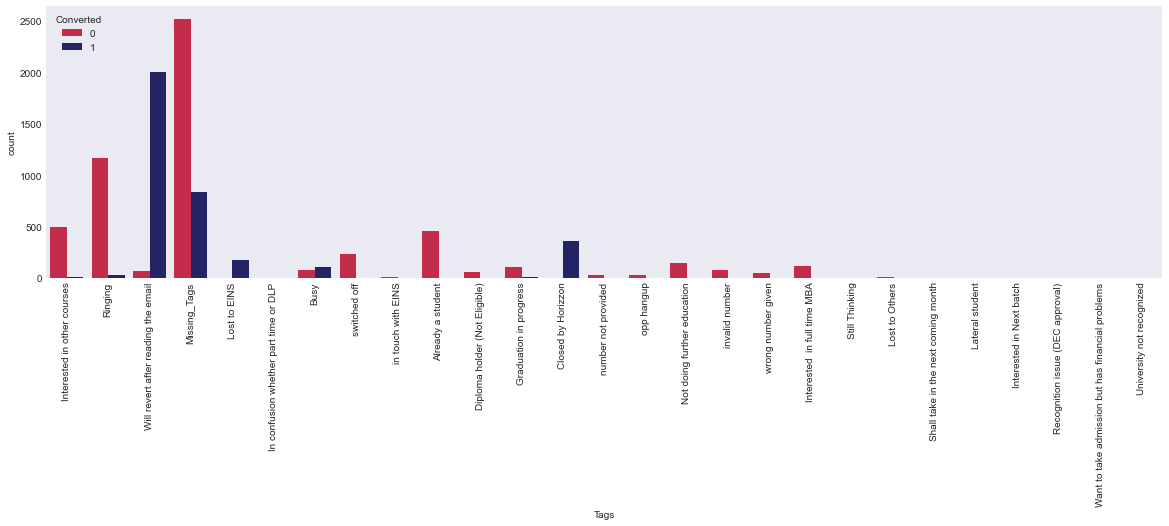

In [36]:
plt.figure(figsize = (20,5))
sns.countplot(leads["Tags"], hue = leads["Converted"], palette = ["crimson","midnightblue"])
plt.xticks(rotation = 90)
plt.show()



### Inferences:
- Positive Conversion rate is observed in "Will revert after reading the email", followed by "Closed by Horizzon".
- Few columns are observed with negligible count of conversions, insignificant.

In [37]:
# Grouping certain categories under "Misc_tags", after contemplating above visualization and concluding insignificant.

leads["Tags"].replace(["invalid number", "wrong number given","number not provided", "Still Thinking","Lost to Others", 
                       "Shall take in the next coming month","Lateral student","Interested in Next batch", 
                       "Recognition issue (DEC approval)", "Want to take admission but has financial problems",
                       "University not recognized", "Diploma holder (Not Eligible)", "in touch with EINS",
                       "In confusion whether part time or DLP", "opp hangup"], "Misc_Tags", inplace = True)

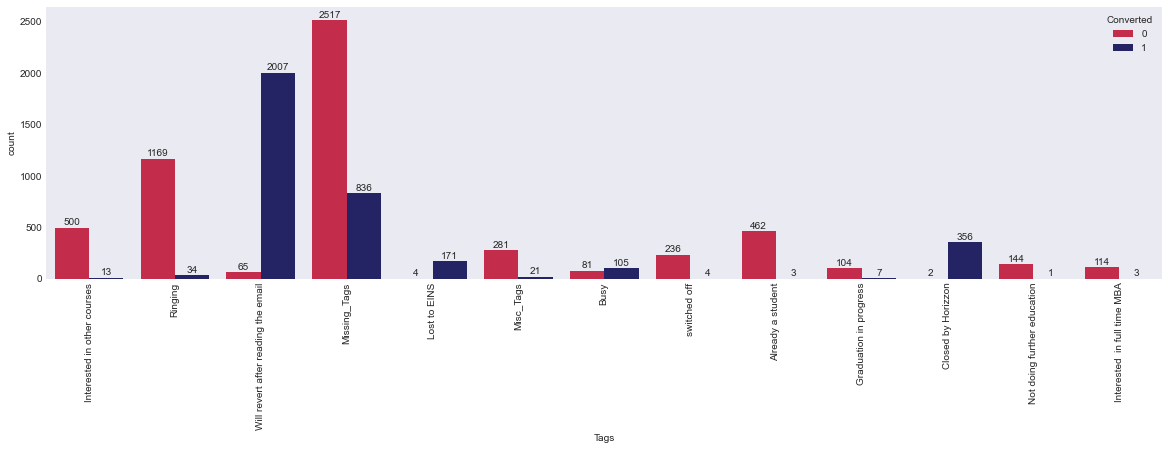

In [38]:
# Plotting after grouping tags
plt.figure(figsize = (20,5))
ax = sns.countplot(leads["Tags"], hue = leads["Converted"], palette = ["crimson","midnightblue"])
plt.xticks(rotation = 90)
for bar in ax.patches:
    ax.annotate(format(bar.get_height(),"0.0f"), (bar.get_x() + bar.get_width() / 2, bar.get_height()), 
                ha="center",va="center", size = 10, xytext = (0, 5), textcoords = "offset points")
plt.show()

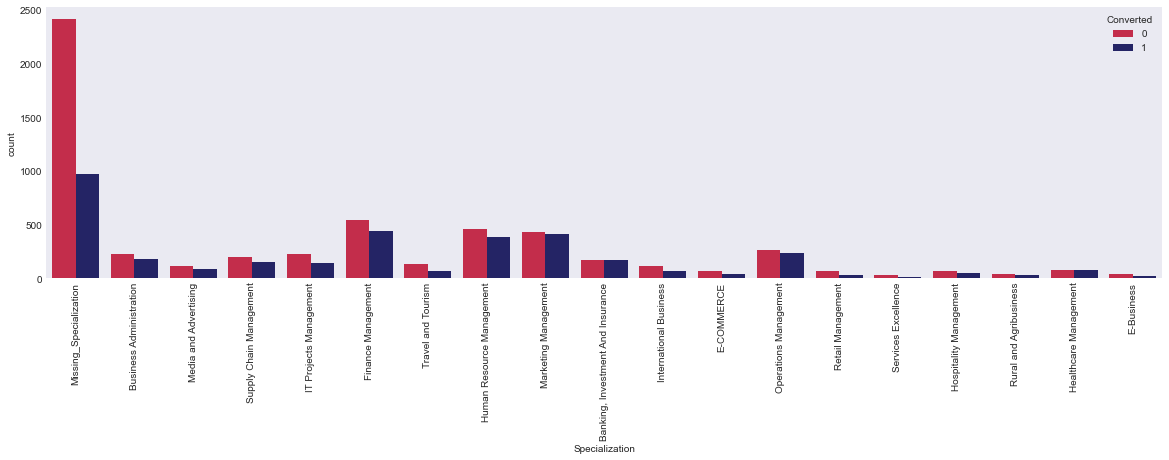

In [39]:
plt.figure(figsize = (20,5))
sns.countplot(leads["Specialization"], hue = leads["Converted"], palette = ["crimson","midnightblue"])
plt.xticks(rotation = 90)
plt.show()

### Inferences:
- Positive conversion rate is observed in "Finance Management", "Human Resouce Management", "Marketing Management","Operations Management" specialization. 
- Certain columns are found insignificant.

In [40]:
# Grouping certain categories under "Misc_tags", after contemplating above visualization and concluding insignificant.
leads["Specialization"].replace(["Services Excellence", "Retail Management", 
                                 "Hospitality Management", "Rural and Agribusiness","Healthcare Management", "E-Business",
                                "E-COMMERCE"], "Misc_Specialization",inplace = True)

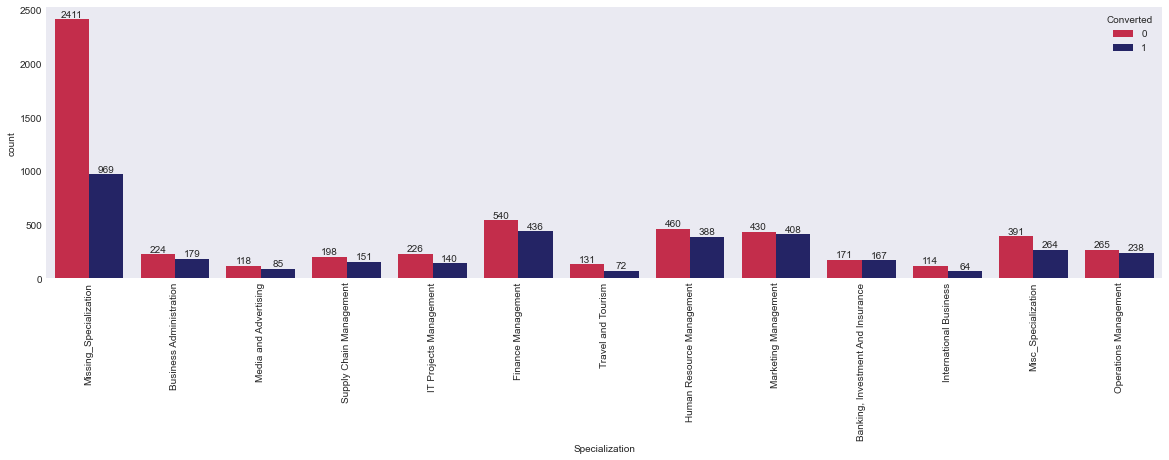

In [41]:
# Plotting after grouping specialization
plt.figure(figsize = (20,5))
ax = sns.countplot(leads["Specialization"], hue = leads["Converted"], palette = ["crimson","midnightblue"])
plt.xticks(rotation = 90)
for bar in ax.patches:
    ax.annotate(format(bar.get_height(),"0.0f"), (bar.get_x() + bar.get_width() / 2, bar.get_height()), 
                ha="center",va="center", size = 10, xytext = (0, 5), textcoords = "offset points")
plt.show()

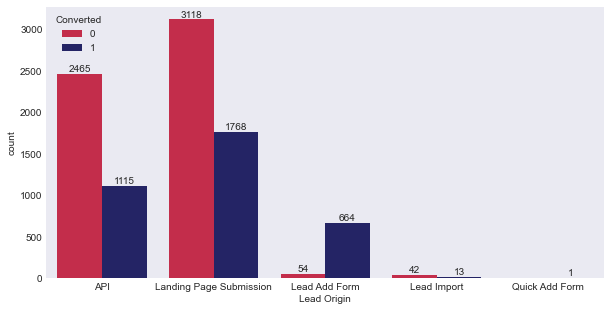

In [42]:
cat_col_plot("Lead Origin",0)

### Inferences:
- Positive conversion rate observed in "Landing Page Submission", followed by "API" Lead Origin.

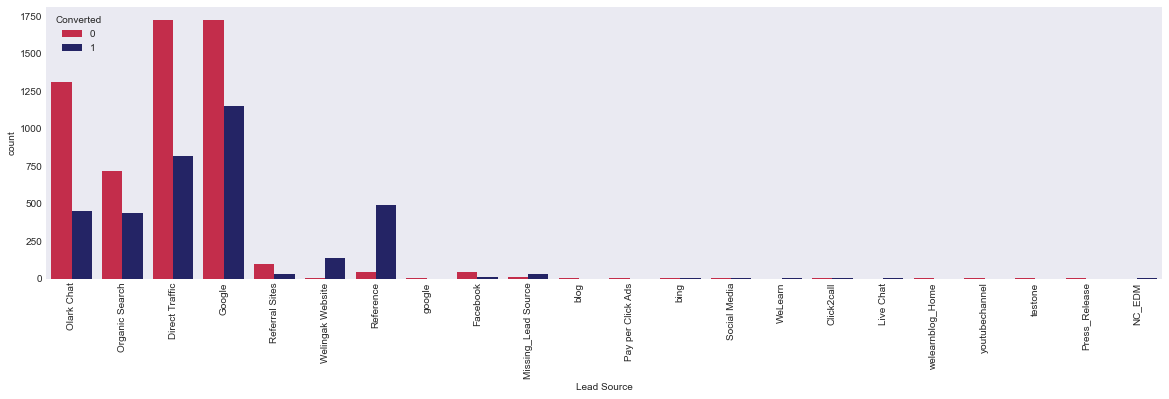

In [43]:
plt.figure(figsize = (20,5))
sns.countplot(leads["Lead Source"], hue = leads["Converted"], palette = ["crimson","midnightblue"])
plt.xticks(rotation = 90)
plt.show()

In [44]:
# Replacing and grouping certain categories
leads["Lead Source"].replace("google","Google",inplace = True)
leads["Lead Source"].replace("Facebook","Social Media",inplace = True)
leads["Lead Source"].replace(["welearnblog_Home","WeLearn","blog","bing","Click2call", "Live Chat", 
                              "youtubechannel", "testone","Press_Release","NC_EDM","Pay per Click Ads"],
                             "Misc_Lead Source",inplace = True)

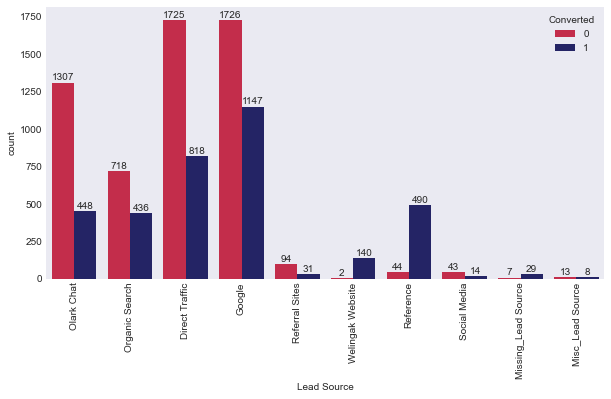

In [45]:
cat_col_plot("Lead Source",90)

### Inferences:
- Positive conversion rate noticed in "Google", followed by "Direct Traffic" Lead source. 

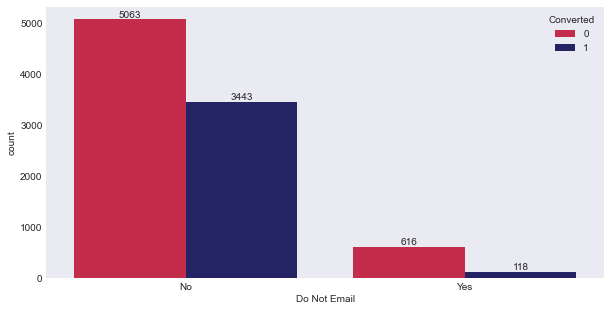

In [46]:
cat_col_plot("Do Not Email",0)

### Inferences:
- No significant conclusion.

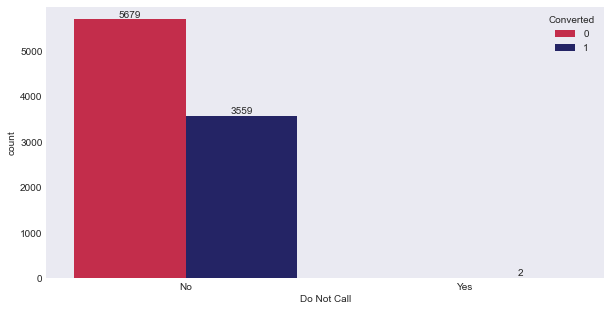

In [47]:
cat_col_plot("Do Not Call",0)

### Inferences:
- The column is imbalanced, count of affirmation is negligible compared to denial. Hence, can be safely dropped.

In [48]:
leads.drop("Do Not Call", axis = 1, inplace = True)

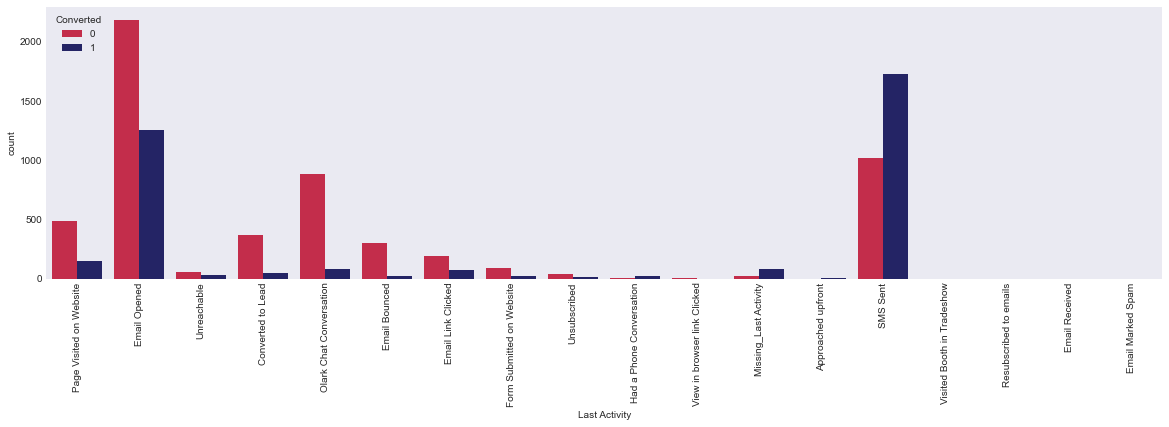

In [49]:
plt.figure(figsize = (20,5))
sns.countplot(leads["Last Activity"], hue = leads["Converted"], palette = ["crimson","midnightblue"])
plt.xticks(rotation = 90)
plt.show()

In [50]:
# Grouped certain insignificant categories under Miscellaneous
leads["Last Activity"].replace(["Unsubscribed","Approached upfront","Resubscribed to emails", 
                                "Email Received","Email Marked Spam","Visited Booth in Tradeshow", 
                                "View in browser link Clicked","Had a Phone Conversation","Unreachable"],
                               "Misc_Last Activity", inplace = True)

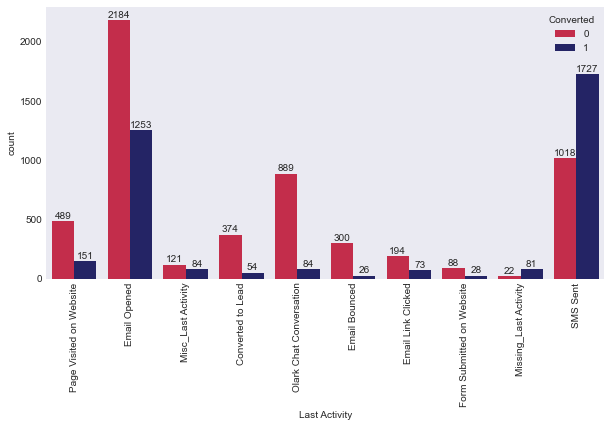

In [51]:
cat_col_plot("Last Activity", 90)

### Inferences:
- Positive conversion rate observed in "Email Opened" and "SMS Sent" Last Activity.

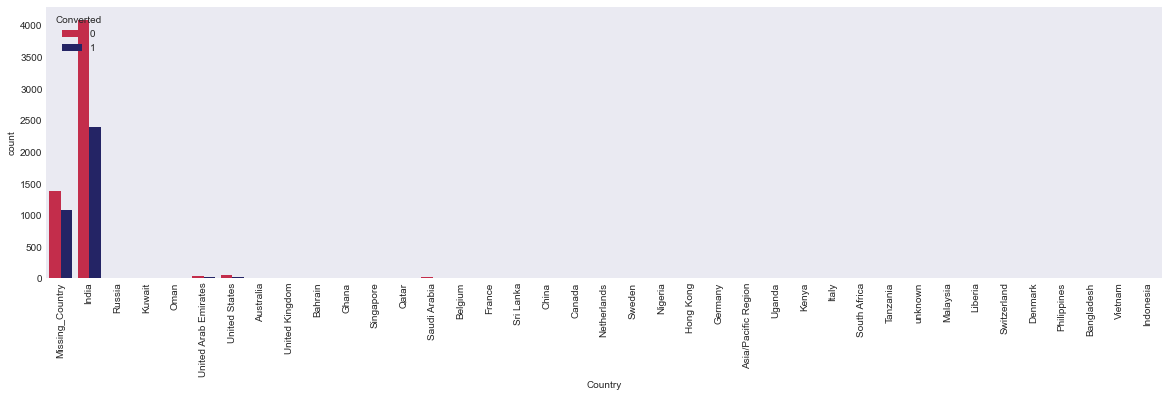

In [52]:
plt.figure(figsize = (20,5))
sns.countplot(leads["Country"], hue = leads["Converted"], palette = ["crimson","midnightblue"])
plt.xticks(rotation = 90)
plt.show()

### Inferences:
- No significant information concluded. Hence, dropping it.

In [53]:
leads.drop("Country", axis = 1, inplace = True)

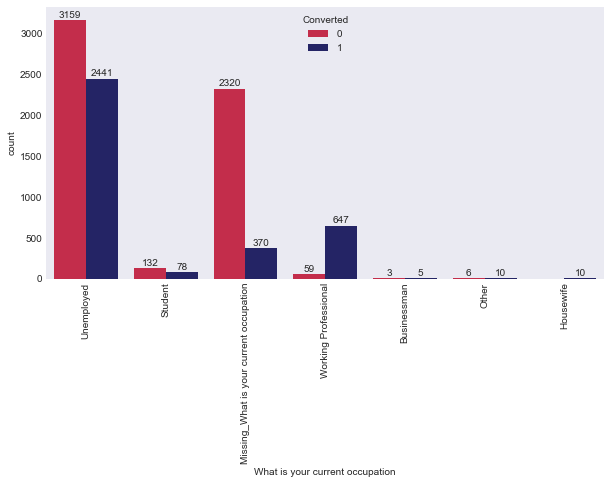

In [54]:
cat_col_plot("What is your current occupation",90)

### Inferences:
- Positive conversion rate observed in unemployed applicants. 

In [55]:
leads["What is your current occupation"].replace(["Businessman","Housewife"], "Other", inplace = True)

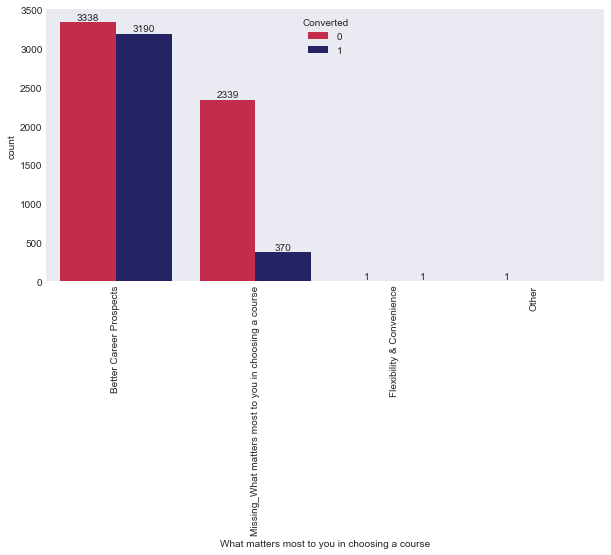

In [56]:
cat_col_plot("What matters most to you in choosing a course",90)

### Inferences:
- Positive conversion rate observed with the motive to improvise career prospects. 

In [57]:
# Grouping insignificant entries into Other.
leads["What matters most to you in choosing a course"].replace("Flexibility & Convenience","Other",inplace = True)

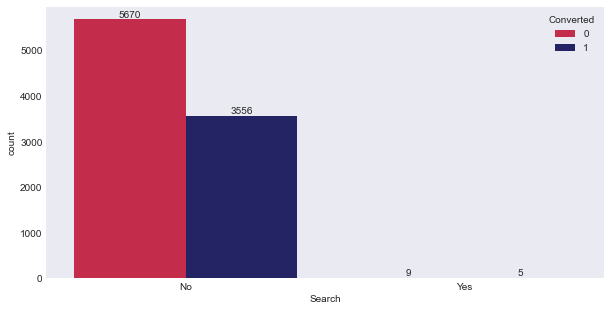

In [58]:
cat_col_plot("Search",0)

### Inferences:
- Imbalanced categories observed, insignificant feature. Hence, dropping it.

In [59]:
leads.drop("Search", axis = 1, inplace = True)

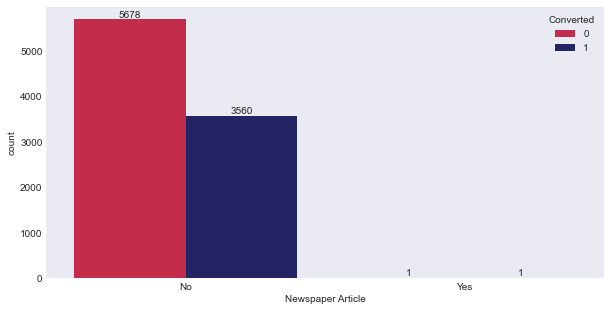

In [60]:
cat_col_plot("Newspaper Article",0)

### Infereces:
- Imbalanced categories observed, insignificant feature. Hence, dropping it.

In [61]:
leads.drop("Newspaper Article", axis = 1, inplace = True)

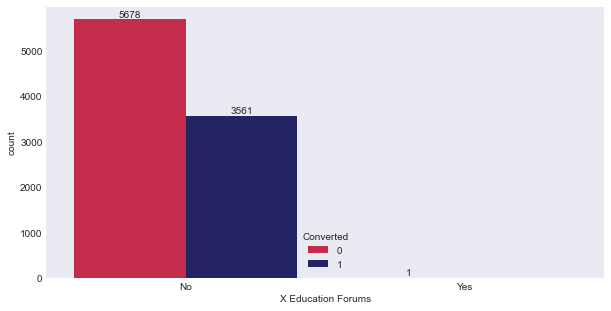

In [62]:
cat_col_plot("X Education Forums",0)

### Inferences:
- Imbalanced categories observed, insignificant feature. Hence, dropping it.

In [63]:
leads.drop("X Education Forums",axis = 1, inplace = True)

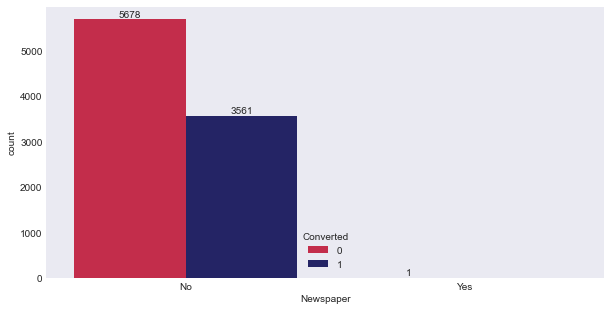

In [64]:
cat_col_plot("Newspaper",0)

### Inferences:
- Imbalanced categories observed, insignificant feature. Hence, dropping it.

In [65]:
leads.drop("Newspaper",axis = 1, inplace = True)

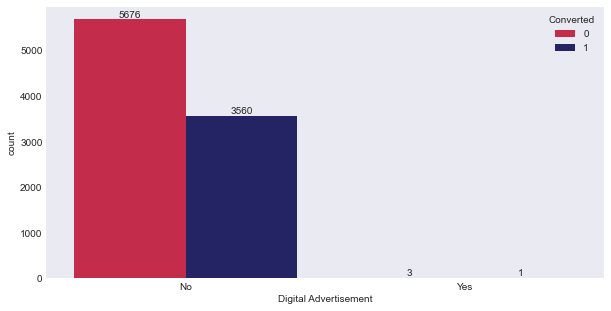

In [66]:
cat_col_plot("Digital Advertisement",0)

### Inferences:
- Imbalanced categories observed, insignificant feature. Hence, dropping it.

In [67]:
leads.drop("Digital Advertisement",axis = 1, inplace = True)

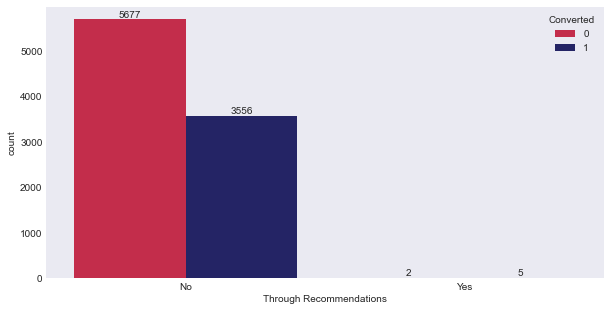

In [68]:
cat_col_plot("Through Recommendations",0)

### Inferences:
- Imbalanced categories observed, insignificant feature. Hence, dropping it.

In [69]:
leads.drop("Through Recommendations",axis = 1, inplace = True)

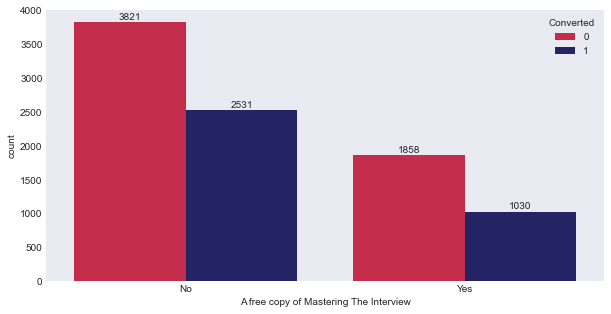

In [70]:
cat_col_plot("A free copy of Mastering The Interview",0)

### Inferences:
- Positive conversion rate observed in both the categories.

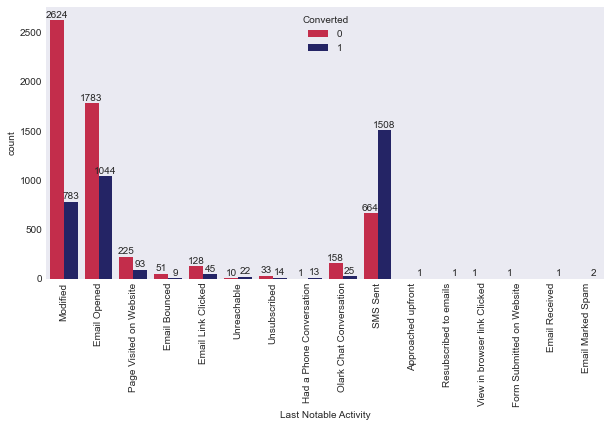

In [71]:
cat_col_plot("Last Notable Activity",90)

In [72]:
# Grouping insignificant categories as Miscellaneous
leads["Last Notable Activity"].replace(["Email Received","Form Submitted on Website",
                                        "View in browser link Clicked","Resubscribed to emails","Email Marked Spam",
                                       "Had a Phone Conversation","Unreachable","Unsubscribed","Approached upfront"],
                                       "Misc_Last Notable Activity", inplace = True)

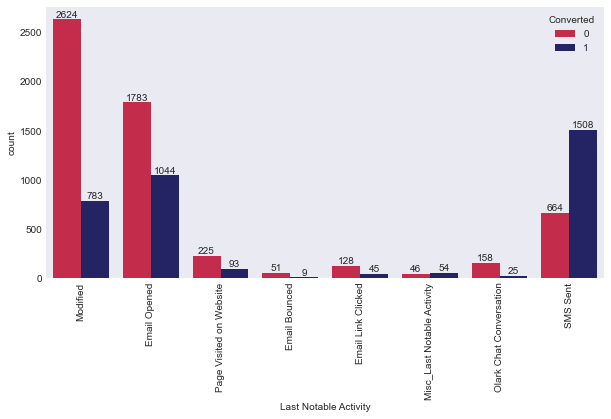

In [73]:
cat_col_plot("Last Notable Activity",90)

### Inferences:
- Positive conversion rate observed in "SMS Sent", followed by "Email Opened" Last notable activity.

In [74]:
# Contingency table of Last Activity and Last Notable Activity
cross_table = pd.crosstab(index = leads["Last Activity"], columns = leads["Last Notable Activity"], margins = False)
cross_table

Last Notable Activity,Email Bounced,Email Link Clicked,Email Opened,Misc_Last Notable Activity,Modified,Olark Chat Conversation,Page Visited on Website,SMS Sent
Last Activity,,,,,,,,
Converted to Lead,0,0,0,0,428,0,0,0
Email Bounced,60,0,0,0,266,0,0,0
Email Link Clicked,0,173,0,0,94,0,0,0
Email Opened,0,0,2827,0,610,0,0,0
Form Submitted on Website,0,0,0,1,115,0,0,0
Misc_Last Activity,0,0,0,99,106,0,0,0
Missing_Last Activity,0,0,0,0,103,0,0,0
Olark Chat Conversation,0,0,0,0,790,183,0,0
Page Visited on Website,0,0,0,0,322,0,318,0


### Inferences:
- Based on the above contingency table, it can be concluded that "Last Activty" and "Last Notable Activity" are observed to hold similar values. It is safe to drop either of them. 

In [75]:
leads.drop("Last Activity", axis = 1, inplace = True)

## Data Preparation
- Substitute dummy variables for categorical columns.
- Train-Test Split.
- Data transformation by scaling features.

#### Substituting dummy variables for categorical columns

In [76]:
# Listing categorical columns from dataset
cat_cols = leads.columns[leads.dtypes == "object"]

In [77]:
cat_cols

Index(['Lead Origin', 'Lead Source', 'Do Not Email', 'Specialization',
       'What is your current occupation',
       'What matters most to you in choosing a course', 'Tags',
       'A free copy of Mastering The Interview', 'Last Notable Activity'],
      dtype='object')

In [78]:
# Dummy variables for categorical columns 
dummy_df = pd.get_dummies(leads[cat_cols], drop_first = True)

In [79]:
dummy_df.head()

,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Origin_Quick Add Form,Lead Source_Google,Lead Source_Misc_Lead Source,Lead Source_Missing_Lead Source,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Social Media,Lead Source_Welingak Website,Do Not Email_Yes,Specialization_Business Administration,Specialization_Finance Management,Specialization_Human Resource Management,Specialization_IT Projects Management,Specialization_International Business,Specialization_Marketing Management,Specialization_Media and Advertising,Specialization_Misc_Specialization,Specialization_Missing_Specialization,Specialization_Operations Management,Specialization_Supply Chain Management,Specialization_Travel and Tourism,What is your current occupation_Other,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional,What matters most to you in choosing a course_Missing_What matters most to you in choosing a course,What matters most to you in choosing a course_Other,Tags_Busy,Tags_Closed by Horizzon,Tags_Graduation in progress,Tags_Interested in full time MBA,Tags_Interested in other courses,Tags_Lost to EINS,Tags_Misc_Tags,Tags_Missing_Tags,Tags_Not doing further education,Tags_Ringing,Tags_Will revert after reading the email,Tags_switched off,A free copy of Mastering The Interview_Yes,Last Notable Activity_Email Link Clicked,Last Notable Activity_Email Opened,Last Notable Activity_Misc_Last Notable Activity,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_SMS Sent
0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,1,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0
4,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0


In [80]:
dummy_df.shape

(9240, 52)

In [81]:
# Dropping original categorical columns from dataset
leads.drop(cat_cols, axis = 1, inplace = True)

In [82]:
# Concatenating dummy variables dataframe and leads dataset
leads = pd.concat([leads,dummy_df],axis = 1)

In [83]:
leads.shape

(9240, 57)

#### Train-Test Split

In [84]:
df_train, df_test = train_test_split(leads, train_size = 0.7, random_state = 100)

In [85]:
df_train.shape, df_test.shape

((6468, 57), (2772, 57))

In [86]:
cor = df_train.corr()

#Correlation with target/output variable
cor_target = abs(cor["Converted"])


#Selecting highly correlated features with target
rel_features = cor_target[cor_target > 0.5]
rel_features

Converted                                   1.000000
Tags_Will revert after reading the email    0.645439
Name: Converted, dtype: float64

In [87]:
y_train = df_train.pop("Converted")
X_train = df_train

#### Feature scaling

In [88]:
num_cols = ["TotalVisits","Total Time Spent on Website", "Page Views Per Visit"]

scaler = MinMaxScaler()

df_train[num_cols] = scaler.fit_transform(df_train[num_cols])

In [89]:
df_train.head()

,Lead Number,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Origin_Quick Add Form,Lead Source_Google,Lead Source_Misc_Lead Source,Lead Source_Missing_Lead Source,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Social Media,Lead Source_Welingak Website,Do Not Email_Yes,Specialization_Business Administration,Specialization_Finance Management,Specialization_Human Resource Management,Specialization_IT Projects Management,Specialization_International Business,Specialization_Marketing Management,Specialization_Media and Advertising,Specialization_Misc_Specialization,Specialization_Missing_Specialization,Specialization_Operations Management,Specialization_Supply Chain Management,Specialization_Travel and Tourism,What is your current occupation_Other,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional,What matters most to you in choosing a course_Missing_What matters most to you in choosing a course,What matters most to you in choosing a course_Other,Tags_Busy,Tags_Closed by Horizzon,Tags_Graduation in progress,Tags_Interested in full time MBA,Tags_Interested in other courses,Tags_Lost to EINS,Tags_Misc_Tags,Tags_Missing_Tags,Tags_Not doing further education,Tags_Ringing,Tags_Will revert after reading the email,Tags_switched off,A free copy of Mastering The Interview_Yes,Last Notable Activity_Email Link Clicked,Last Notable Activity_Email Opened,Last Notable Activity_Misc_Last Notable Activity,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_SMS Sent
1871,641410,0.000000,0.000000,0.000000,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0
6795,597687,0.190476,0.214349,0.088667,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,0
3516,626825,0.238095,0.046655,0.166667,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0
8105,587928,0.238095,0.541373,0.333333,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1
3934,622366,0.000000,0.000000,0.000000,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0


In [90]:
# Popping lead number from df_train
lead_number_col = df_train.pop("Lead Number")

In [91]:
# Popping lead number from df_test
lead_number_test_col = df_test.pop("Lead Number")

In [92]:
df_train.head()

,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Origin_Quick Add Form,Lead Source_Google,Lead Source_Misc_Lead Source,Lead Source_Missing_Lead Source,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Social Media,Lead Source_Welingak Website,Do Not Email_Yes,Specialization_Business Administration,Specialization_Finance Management,Specialization_Human Resource Management,Specialization_IT Projects Management,Specialization_International Business,Specialization_Marketing Management,Specialization_Media and Advertising,Specialization_Misc_Specialization,Specialization_Missing_Specialization,Specialization_Operations Management,Specialization_Supply Chain Management,Specialization_Travel and Tourism,What is your current occupation_Other,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional,What matters most to you in choosing a course_Missing_What matters most to you in choosing a course,What matters most to you in choosing a course_Other,Tags_Busy,Tags_Closed by Horizzon,Tags_Graduation in progress,Tags_Interested in full time MBA,Tags_Interested in other courses,Tags_Lost to EINS,Tags_Misc_Tags,Tags_Missing_Tags,Tags_Not doing further education,Tags_Ringing,Tags_Will revert after reading the email,Tags_switched off,A free copy of Mastering The Interview_Yes,Last Notable Activity_Email Link Clicked,Last Notable Activity_Email Opened,Last Notable Activity_Misc_Last Notable Activity,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_SMS Sent
1871,0.000000,0.000000,0.000000,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0
6795,0.190476,0.214349,0.088667,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,0
3516,0.238095,0.046655,0.166667,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0
8105,0.238095,0.541373,0.333333,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1
3934,0.000000,0.000000,0.000000,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0


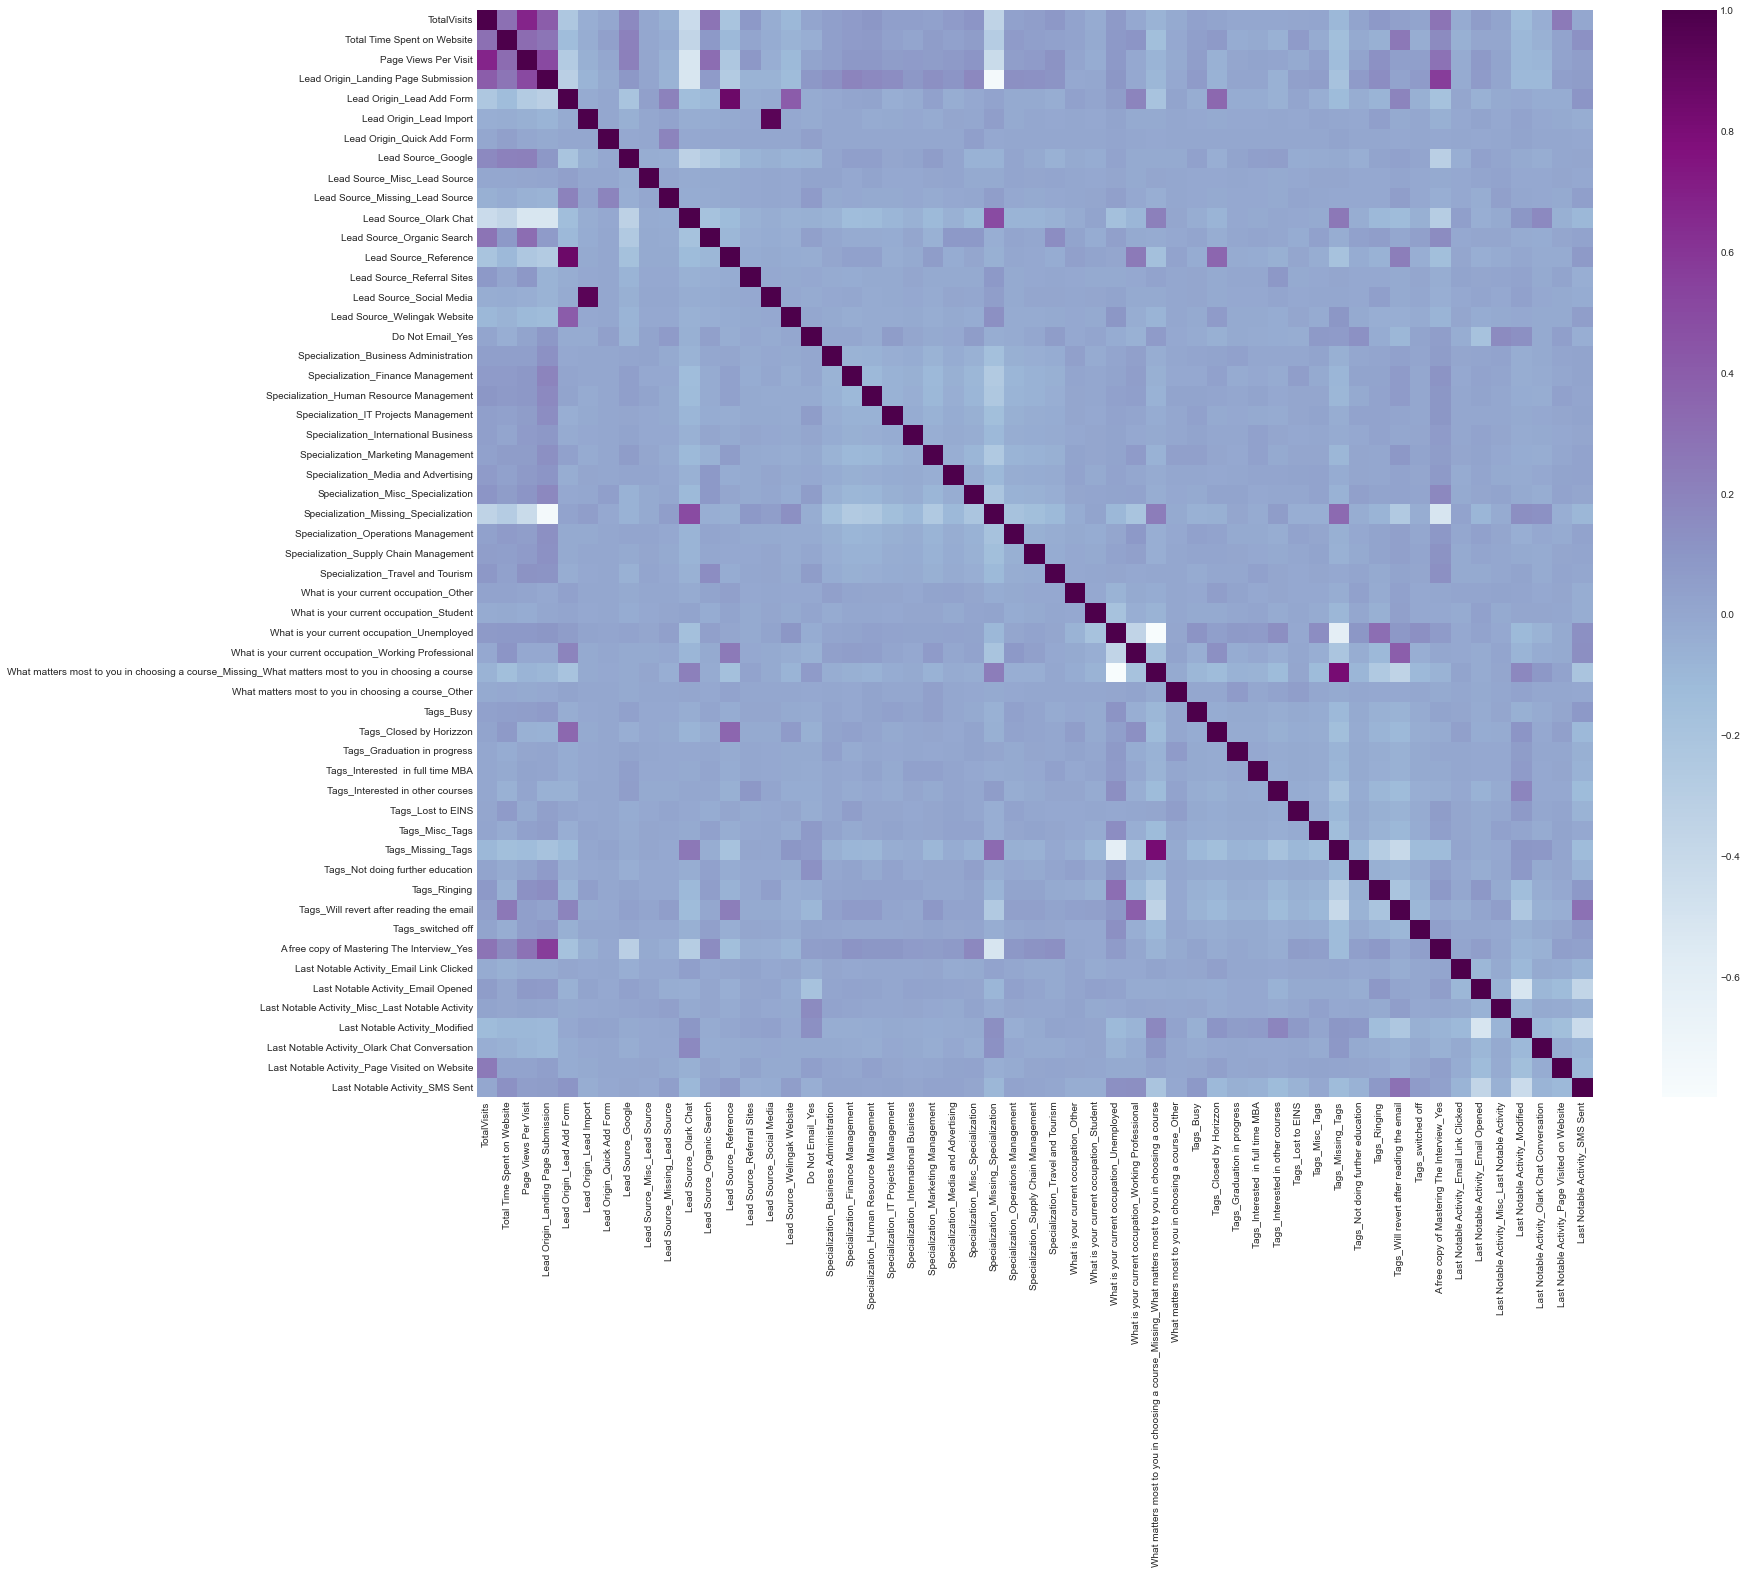

In [93]:
plt.figure(figsize = (25,20))
sns.heatmap(df_train.corr(), cmap = "BuPu")
plt.show()

## Model Building

### Recursive Feature Elimination

In [94]:
logreg = LogisticRegression()

In [95]:
# Recursive feature elimination to select features

rfe = RFE(logreg, n_features_to_select = 15)
rfe = rfe.fit(X_train, y_train)

In [96]:
list(zip(X_train.columns, rfe.support_, rfe.ranking_))

[('TotalVisits', False, 8),
 ('Total Time Spent on Website', True, 1),
 ('Page Views Per Visit', False, 21),
 ('Lead Origin_Landing Page Submission', False, 15),
 ('Lead Origin_Lead Add Form', True, 1),
 ('Lead Origin_Lead Import', False, 40),
 ('Lead Origin_Quick Add Form', False, 24),
 ('Lead Source_Google', False, 36),
 ('Lead Source_Misc_Lead Source', False, 18),
 ('Lead Source_Missing_Lead Source', False, 39),
 ('Lead Source_Olark Chat', False, 6),
 ('Lead Source_Organic Search', False, 37),
 ('Lead Source_Reference', False, 27),
 ('Lead Source_Referral Sites', False, 41),
 ('Lead Source_Social Media', False, 17),
 ('Lead Source_Welingak Website', True, 1),
 ('Do Not Email_Yes', True, 1),
 ('Specialization_Business Administration', False, 35),
 ('Specialization_Finance Management', False, 33),
 ('Specialization_Human Resource Management', False, 30),
 ('Specialization_IT Projects Management', False, 19),
 ('Specialization_International Business', False, 7),
 ('Specialization_Marke

In [97]:
# Lisitng columns supported by RFE
col = X_train.columns[rfe.support_]

In [98]:
X_train.columns[~rfe.support_]

Index(['TotalVisits', 'Page Views Per Visit',
       'Lead Origin_Landing Page Submission', 'Lead Origin_Lead Import',
       'Lead Origin_Quick Add Form', 'Lead Source_Google',
       'Lead Source_Misc_Lead Source', 'Lead Source_Missing_Lead Source',
       'Lead Source_Olark Chat', 'Lead Source_Organic Search',
       'Lead Source_Reference', 'Lead Source_Referral Sites',
       'Lead Source_Social Media', 'Specialization_Business Administration',
       'Specialization_Finance Management',
       'Specialization_Human Resource Management',
       'Specialization_IT Projects Management',
       'Specialization_International Business',
       'Specialization_Marketing Management',
       'Specialization_Media and Advertising',
       'Specialization_Misc_Specialization',
       'Specialization_Missing_Specialization',
       'Specialization_Operations Management',
       'Specialization_Supply Chain Management',
       'Specialization_Travel and Tourism',
       'What is your current 

In [99]:
X_train = X_train[col]

### Variance Inflation factor 

In [100]:
# User-defined function for variance inflation factor 
def funcVIF(df):
    
    vif = pd.DataFrame()
    vif['Features'] = df.columns
    vif['VIF'] = [variance_inflation_factor(df.values, i) 
                  for i in range(df.shape[1])]
    
    vif['VIF'] = round(vif['VIF'], 2)
    vif = vif.sort_values(by = "VIF", ascending = False)
    return vif 

#### 1. Logistic regression model

In [101]:
# Adding constant 
X_train_sm = sm.add_constant(X_train)

# Building logistic model, using generalized linear model
logm1 = sm.GLM(y_train, X_train_sm, family = sm.families.Binomial())
res = logm1.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6452
Model Family:                Binomial   Df Model:                           15
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1193.1
Date:                Tue, 15 Nov 2022   Deviance:                       2386.2
Time:                        18:06:38   Pearson chi2:                 9.34e+03
No. Iterations:                     8   Pseudo R-squ. (CS):             0.6173
Covariance Type:            nonrobust                                         
=======================================================================================================================================================================
                                                                                                          coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------------------------------------------------------------------------
const                                                                                                  -4.4965      0.200    -22.534      0.000      -4.888      -4.105
Total Time Spent on Website                                                                             3.6560      0.229     15.995      0.000       3.208       4.104
Lead Origin_Lead Add Form                                                                               0.8473      0.327      2.591      0.010       0.206       1.488
Lead Source_Welingak Website                                                                            2.5293      0.805      3.142      0.002       0.952       4.107
Do Not Email_Yes                                                                                       -1.2114      0.242     -4.999      0.000      -1.686      -0.736
What matters most to you in choosing a course_Missing_What matters most to you in choosing a course    -2.6118      0.152    -17.201      0.000      -2.909      -2.314
Tags_Busy                                                                                               2.3384      0.286      8.179      0.000       1.778       2.899
Tags_Closed by Horizzon                                                                                 8.7779      1.032      8.508      0.000       6.756      10.800
Tags_Lost to EINS                                                                                       9.0649      0.769     11.792      0.000       7.558      10.572
Tags_Missing_Tags                                                                                       3.9213      0.221     17.713      0.000       3.487       4.355
Tags_Not doing further education                                                                       -0.9959      1.030     -0.967      0.333      -3.014       1.022
Tags_Ringing                                                                                           -1.5366      0.290     -5.301      0.000      -2.105      -0.968
Tags_Will revert after reading the email                                                                6.2746      0.245     25.578      0.000       5.794       6.755
Tags_switched off                                                                                      -1.6892      0.556     -3.040      0.002      -2.778      -0.600
Last Notable Activity_Misc_Last Notable Activity                                                        1.4250      0.514      2.771      0.006       0.417       2.433
Last Notable Activity_SMS Sent                             

In [102]:
funcVIF(X_train)

,Features,VIF
8,Tags_Missing_Tags,5.35
4,What matters most to you in choosing a course_...,4.78
11,Tags_Will revert after reading the email,2.00
0,Total Time Spent on Website,1.99
1,Lead Origin_Lead Add Form,1.74
14,Last Notable Activity_SMS Sent,1.60
6,Tags_Closed by Horizzon,1.35
2,Lead Source_Welingak Website,1.34
10,Tags_Ringing,1.18
3,Do Not Email_Yes,1.13


### Inferences:
- Tags_Not doing further education holds a p-value greater than 0.05, insignificant predictor. Hence, dropping it.

In [103]:
X_train.drop("Tags_Not doing further education", axis = 1, inplace = True)

#### 2. Logistic Regression model

In [104]:
X_train_sm = sm.add_constant(X_train)
logm2 = sm.GLM(y_train, X_train_sm, family = sm.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6453
Model Family:                Binomial   Df Model:                           14
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1193.7
Date:                Tue, 15 Nov 2022   Deviance:                       2387.5
Time:                        18:06:39   Pearson chi2:                 9.28e+03
No. Iterations:                     8   Pseudo R-squ. (CS):             0.6172
Covariance Type:            nonrobust                                         
=======================================================================================================================================================================
                                                                                                          coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------------------------------------------------------------------------
const                                                                                                  -4.5456      0.197    -23.118      0.000      -4.931      -4.160
Total Time Spent on Website                                                                             3.6559      0.229     15.996      0.000       3.208       4.104
Lead Origin_Lead Add Form                                                                               0.8512      0.328      2.599      0.009       0.209       1.493
Lead Source_Welingak Website                                                                            2.5268      0.805      3.138      0.002       0.949       4.105
Do Not Email_Yes                                                                                       -1.2243      0.242     -5.068      0.000      -1.698      -0.751
What matters most to you in choosing a course_Missing_What matters most to you in choosing a course    -2.6126      0.152    -17.199      0.000      -2.910      -2.315
Tags_Busy                                                                                               2.3856      0.284      8.400      0.000       1.829       2.942
Tags_Closed by Horizzon                                                                                 8.8255      1.031      8.559      0.000       6.804      10.847
Tags_Lost to EINS                                                                                       9.1153      0.768     11.870      0.000       7.610      10.620
Tags_Missing_Tags                                                                                       3.9706      0.219     18.164      0.000       3.542       4.399
Tags_Ringing                                                                                           -1.4917      0.288     -5.176      0.000      -2.057      -0.927
Tags_Will revert after reading the email                                                                6.3234      0.243     26.034      0.000       5.847       6.799
Tags_switched off                                                                                      -1.6439      0.555     -2.963      0.003      -2.731      -0.557
Last Notable Activity_Misc_Last Notable Activity                                                        1.4173      0.513      2.765      0.006       0.413       2.422
Last Notable Activity_SMS Sent                                                                          2.5439      0.136     18.683      0.000       2.277       2.811
===========================================================

In [105]:
funcVIF(X_train)

,Features,VIF
8,Tags_Missing_Tags,5.34
4,What matters most to you in choosing a course_...,4.78
10,Tags_Will revert after reading the email,1.99
0,Total Time Spent on Website,1.97
1,Lead Origin_Lead Add Form,1.73
13,Last Notable Activity_SMS Sent,1.60
6,Tags_Closed by Horizzon,1.35
2,Lead Source_Welingak Website,1.34
9,Tags_Ringing,1.17
3,Do Not Email_Yes,1.10


### Inferences:
- Tags_Missing_Tags holds vif greater than 5. Therefore, dropping it.

In [106]:
X_train.drop("Tags_Missing_Tags", axis = 1, inplace = True)

#### 3. Logistic Regression Model

In [107]:
X_train_sm = sm.add_constant(X_train)
logm3 = sm.GLM(y_train, X_train_sm, family = sm.families.Binomial())
res = logm3.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6454
Model Family:                Binomial   Df Model:                           13
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1433.8
Date:                Tue, 15 Nov 2022   Deviance:                       2867.6
Time:                        18:06:39   Pearson chi2:                 9.73e+03
No. Iterations:                     8   Pseudo R-squ. (CS):             0.5877
Covariance Type:            nonrobust                                         
=======================================================================================================================================================================
                                                                                                          coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------------------------------------------------------------------------
const                                                                                                  -2.5857      0.098    -26.454      0.000      -2.777      -2.394
Total Time Spent on Website                                                                             3.4180      0.202     16.910      0.000       3.022       3.814
Lead Origin_Lead Add Form                                                                               1.0960      0.321      3.419      0.001       0.468       1.724
Lead Source_Welingak Website                                                                            4.2553      0.801      5.315      0.000       2.686       5.824
Do Not Email_Yes                                                                                       -1.2044      0.220     -5.485      0.000      -1.635      -0.774
What matters most to you in choosing a course_Missing_What matters most to you in choosing a course    -0.6162      0.114     -5.423      0.000      -0.839      -0.393
Tags_Busy                                                                                               0.3912      0.239      1.636      0.102      -0.077       0.860
Tags_Closed by Horizzon                                                                                 6.7866      1.015      6.688      0.000       4.798       8.775
Tags_Lost to EINS                                                                                       5.8815      0.722      8.145      0.000       4.466       7.297
Tags_Ringing                                                                                           -3.5552      0.242    -14.677      0.000      -4.030      -3.080
Tags_Will revert after reading the email                                                                4.3564      0.178     24.512      0.000       4.008       4.705
Tags_switched off                                                                                      -3.7206      0.531     -7.001      0.000      -4.762      -2.679
Last Notable Activity_Misc_Last Notable Activity                                                        1.2869      0.486      2.648      0.008       0.334       2.239
Last Notable Activity_SMS Sent                                                                          2.7547      0.122     22.576      0.000       2.516       2.994
=======================================================================================================================================================================
"""

In [108]:
funcVIF(X_train)

,Features,VIF
9,Tags_Will revert after reading the email,1.89
0,Total Time Spent on Website,1.86
1,Lead Origin_Lead Add Form,1.72
12,Last Notable Activity_SMS Sent,1.54
6,Tags_Closed by Horizzon,1.33
2,Lead Source_Welingak Website,1.26
4,What matters most to you in choosing a course_...,1.17
8,Tags_Ringing,1.15
3,Do Not Email_Yes,1.10
5,Tags_Busy,1.05


### Inferences:
- The p-value of Tags_Busy is observed to be greater than 0.05, hence dropping it.

In [109]:
X_train.drop("Tags_Busy", axis = 1, inplace = True)

#### 4. Logistic Regression Model

In [110]:
X_train_sm = sm.add_constant(X_train)
logm4 = sm.GLM(y_train, X_train_sm, family = sm.families.Binomial())
res = logm4.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6455
Model Family:                Binomial   Df Model:                           12
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1435.2
Date:                Tue, 15 Nov 2022   Deviance:                       2870.3
Time:                        18:06:39   Pearson chi2:                 9.88e+03
No. Iterations:                     8   Pseudo R-squ. (CS):             0.5875
Covariance Type:            nonrobust                                         
=======================================================================================================================================================================
                                                                                                          coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------------------------------------------------------------------------
const                                                                                                  -2.5563      0.096    -26.751      0.000      -2.744      -2.369
Total Time Spent on Website                                                                             3.4307      0.202     16.991      0.000       3.035       3.826
Lead Origin_Lead Add Form                                                                               1.0888      0.321      3.394      0.001       0.460       1.718
Lead Source_Welingak Website                                                                            4.2327      0.801      5.285      0.000       2.663       5.802
Do Not Email_Yes                                                                                       -1.2194      0.220     -5.555      0.000      -1.650      -0.789
What matters most to you in choosing a course_Missing_What matters most to you in choosing a course    -0.6570      0.111     -5.927      0.000      -0.874      -0.440
Tags_Closed by Horizzon                                                                                 6.7590      1.015      6.661      0.000       4.770       8.748
Tags_Lost to EINS                                                                                       5.8687      0.722      8.126      0.000       4.453       7.284
Tags_Ringing                                                                                           -3.6148      0.240    -15.072      0.000      -4.085      -3.145
Tags_Will revert after reading the email                                                                4.3235      0.177     24.493      0.000       3.977       4.669
Tags_switched off                                                                                      -3.7796      0.530     -7.125      0.000      -4.819      -2.740
Last Notable Activity_Misc_Last Notable Activity                                                        1.3248      0.486      2.726      0.006       0.372       2.277
Last Notable Activity_SMS Sent                                                                          2.7854      0.121     23.052      0.000       2.549       3.022
=======================================================================================================================================================================
"""

In [111]:
funcVIF(X_train)

,Features,VIF
8,Tags_Will revert after reading the email,1.85
0,Total Time Spent on Website,1.82
1,Lead Origin_Lead Add Form,1.72
11,Last Notable Activity_SMS Sent,1.50
5,Tags_Closed by Horizzon,1.33
2,Lead Source_Welingak Website,1.26
4,What matters most to you in choosing a course_...,1.16
7,Tags_Ringing,1.15
3,Do Not Email_Yes,1.10
10,Last Notable Activity_Misc_Last Notable Activity,1.05


### Inferences:
- The predictors are statistically significant, VIFs and p-values are in range.
- Self-contemplating "Missing_What matters most you in choosing a course" seems statistically significant, but irrelevant. Hence, dropping it.

In [112]:
X_train.drop("What matters most to you in choosing a course_Missing_What matters most to you in choosing a course", axis = 1, inplace = True)

#### 5. Logistic Regression model

In [113]:
X_train_sm = sm.add_constant(X_train)
logm5 = sm.GLM(y_train, X_train_sm, family = sm.families.Binomial())
res = logm5.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6456
Model Family:                Binomial   Df Model:                           11
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1453.1
Date:                Tue, 15 Nov 2022   Deviance:                       2906.2
Time:                        18:06:39   Pearson chi2:                 9.99e+03
No. Iterations:                     8   Pseudo R-squ. (CS):             0.5852
Covariance Type:            nonrobust                                         
====================================================================================================================
                                                       coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------------------
const                                               -2.8665      0.084    -34.097      0.000      -3.031      -2.702
Total Time Spent on Website                          3.4674      0.200     17.296      0.000       3.074       3.860
Lead Origin_Lead Add Form                            1.2133      0.327      3.709      0.000       0.572       1.854
Lead Source_Welingak Website                         4.4096      0.803      5.491      0.000       2.836       5.984
Do Not Email_Yes                                    -1.1888      0.218     -5.444      0.000      -1.617      -0.761
Tags_Closed by Horizzon                              7.0127      1.013      6.920      0.000       5.026       8.999
Tags_Lost to EINS                                    5.9160      0.721      8.201      0.000       4.502       7.330
Tags_Ringing                                        -3.3381      0.235    -14.200      0.000      -3.799      -2.877
Tags_Will revert after reading the email             4.6103      0.171     27.001      0.000       4.276       4.945
Tags_switched off                                   -3.4950      0.528     -6.614      0.000      -4.531      -2.459
Last Notable Activity_Misc_Last Notable Activity     1.2241      0.479      2.553      0.011       0.284       2.164
Last Notable Activity_SMS Sent                       2.8012      0.120     23.292      0.000       2.565       3.037
====================================================================================================================
"""

In [114]:
funcVIF(X_train)

,Features,VIF
7,Tags_Will revert after reading the email,1.78
1,Lead Origin_Lead Add Form,1.71
0,Total Time Spent on Website,1.68
10,Last Notable Activity_SMS Sent,1.49
4,Tags_Closed by Horizzon,1.32
2,Lead Source_Welingak Website,1.26
6,Tags_Ringing,1.13
3,Do Not Email_Yes,1.07
9,Last Notable Activity_Misc_Last Notable Activity,1.05
5,Tags_Lost to EINS,1.04


### Inferences:
- All the p-values and VIFs observed to be in range, and proves the significance of the model. 
- The Pearson Chi-square and Log-likelihood signifies the overall goodness of fit of model. 

## Making predictions on train set

In [115]:
X_train_sm = sm.add_constant(X_train)
y_train_pred = res.predict(X_train_sm)
y_train_pred[:10]

1871    0.002016
6795    0.106854
3516    0.002369
8105    0.178540
3934    0.053834
4844    0.998928
3297    0.002295
8071    0.997213
987     0.164831
7423    0.999023
dtype: float64

In [116]:
y_train_pred = y_train_pred.values.reshape(-1)
y_train_pred[:10]

array([0.00201604, 0.10685418, 0.0023692 , 0.17853997, 0.05383415,
       0.99892813, 0.00229464, 0.99721278, 0.16483088, 0.99902331])

In [117]:
y_train_pred_final = pd.DataFrame()
y_train_pred_final["Lead ID"] = y_train.index
y_train_pred_final["Converted"] = y_train.values
y_train_pred_final["Conversion_probs"] = y_train_pred
y_train_pred_final.head()

,Lead ID,Converted,Conversion_probs
0,1871,0,0.002016
1,6795,0,0.106854
2,3516,0,0.002369
3,8105,0,0.178540
4,3934,0,0.053834


In [118]:
# Setting the threshold as 0.5
y_train_pred_final["Predicted"] = y_train_pred_final.Conversion_probs.map(lambda x:1 if x > 0.5 else 0 )
y_train_pred_final.head()

,Lead ID,Converted,Conversion_probs,Predicted
0,1871,0,0.002016,0
1,6795,0,0.106854,0
2,3516,0,0.002369,0
3,8105,0,0.178540,0
4,3934,0,0.053834,0


## Residual Analysis

In [119]:
resid = res.resid_deviance.copy()

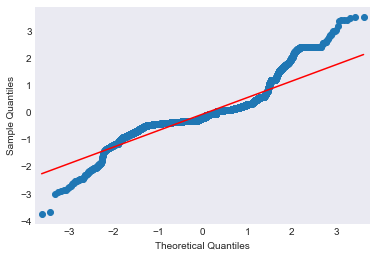

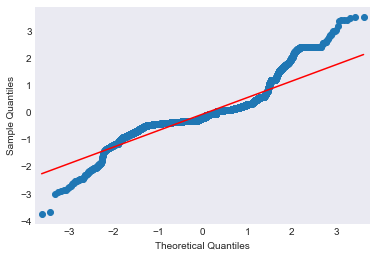

In [120]:
graphics.gofplots.qqplot(resid, line = "r")

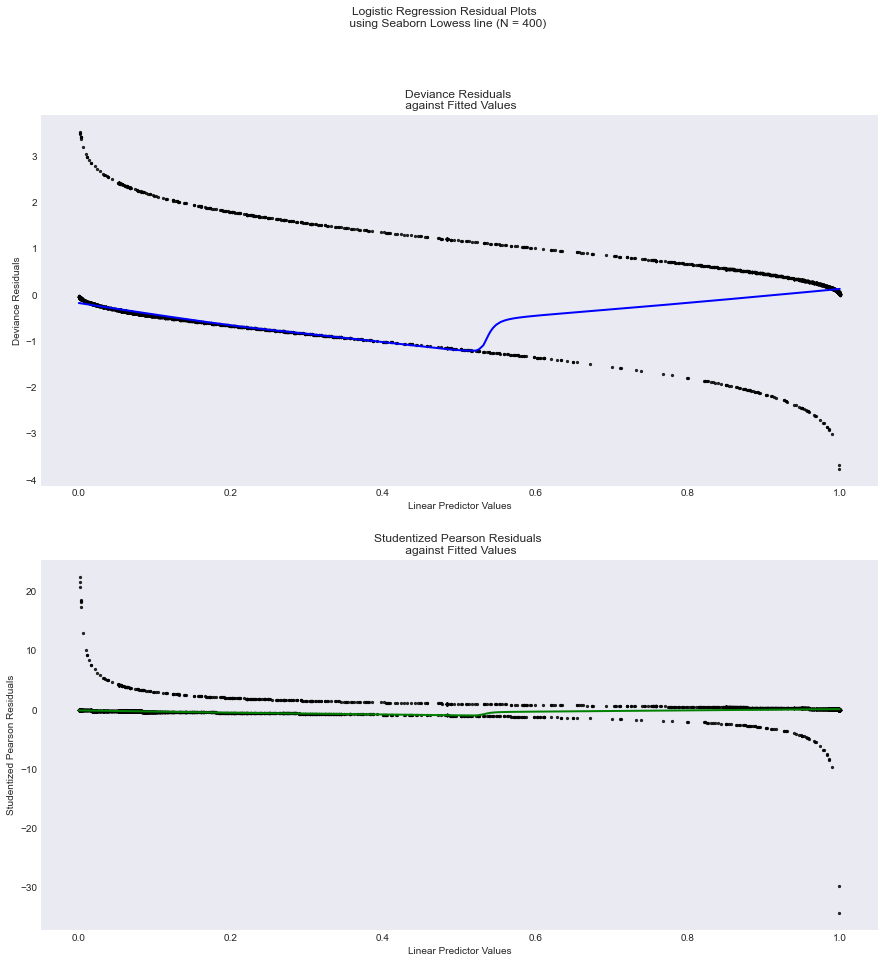

In [121]:
## Plotting multiple plots same figure
fig, (axL, axR) = plt.subplots(2, figsize=(15, 15))
plt.suptitle("Logistic Regression Residual Plots \n using Seaborn Lowess line (N = 400)")


# Deviance Residuals
sns.regplot(res.fittedvalues, res.resid_deviance, ax= axL,
            color="black", scatter_kws={"s": 5},
            line_kws={"color":"b", "alpha":1, "lw":2}, lowess=True)

axL.set_title("Deviance Residuals \n against Fitted Values")
axL.set_xlabel("Linear Predictor Values")
axL.set_ylabel("Deviance Residuals")

# Studentized Pearson Residuals
sns.regplot(res.fittedvalues, res.resid_pearson, ax= axR,
            color="black", scatter_kws={"s": 5},
            line_kws={"color":"g", "alpha":1, "lw":2}, lowess=True)

axR.set_title("Studentized Pearson Residuals \n against Fitted Values")
axR.set_xlabel("Linear Predictor Values")
axR.set_ylabel("Studentized Pearson Residuals")

plt.show()

### Inferences:
The plot do approximate horizontal line with 0 intercept. This suggests that there is no significant model inadequacy.

## Model Evaluation

### Confusion Matrix

In [122]:
cmatrix = confusion_matrix(y_train_pred_final["Converted"], y_train_pred_final["Predicted"])
cmatrix

array([[3841,  161],
       [ 404, 2062]], dtype=int64)

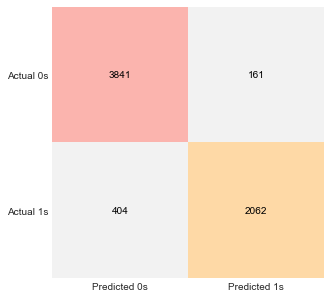

In [123]:
fig, ax = plt.subplots(figsize=(5, 5))
ax.imshow(cmatrix, cmap = "Pastel1_r")
ax.grid(False)
ax.xaxis.set(ticks=(0, 1), ticklabels=('Predicted 0s', 'Predicted 1s'))
ax.yaxis.set(ticks=(0, 1), ticklabels=('Actual 0s', 'Actual 1s'))
ax.set_ylim(1.5, -0.5)
for i in range(2):
    for j in range(2):
        ax.text(j, i, cmatrix[i, j], ha='center', va='center', color='black')
plt.show()

### Classification Report

In [124]:
print(metrics.classification_report(y_train_pred_final["Converted"], y_train_pred_final["Predicted"]))

              precision    recall  f1-score   support

           0       0.90      0.96      0.93      4002
           1       0.93      0.84      0.88      2466

    accuracy                           0.91      6468
   macro avg       0.92      0.90      0.91      6468
weighted avg       0.91      0.91      0.91      6468



### Accuracy

In [125]:
print(metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.Predicted))

0.9126468769325912


### Recall

In [126]:
print(metrics.recall_score(y_train_pred_final.Converted, y_train_pred_final.Predicted))

0.8361719383617194


### Other metrics

In [127]:
TN = cmatrix[0,0] # True Negatives
FP = cmatrix[0,1] # False Positives
FN = cmatrix[1,0] # False Negatives
TP = cmatrix[1,1] # True Positives

#### Sensitivity

In [128]:
# Sensitivity of logistic regression model
TP / float(TP + FN)

0.8361719383617194

#### Specificity

In [129]:
# Specificity of Logistic regression model
TN / float(TN + FP)

0.9597701149425287

#### False Positive Rate

In [130]:
# False positive rate 
FP / float(TN + FP)

0.040229885057471264

#### Positive Predictive Value

In [131]:
# Positive Predictive Value
TP / float(TP + FP)

0.9275753486279802

#### Negative Predictive Value

In [132]:
# Negative Predictive Value
TN / float(TN + FN)

0.904829210836278

### AUC - ROC Curve

In [133]:
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs, drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic')
    plt.legend(loc="lower right")
    plt.show()

    return None

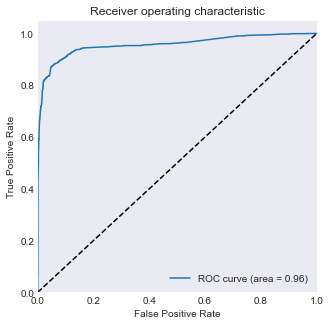

In [134]:
draw_roc(y_train_pred_final.Converted, y_train_pred_final.Conversion_probs)

## Finding Optimal Cut-off

In [135]:
# Finding different probability cutoffs 

nums = [float(x)/10 for x in range(10)]
for i in nums:
    y_train_pred_final[i]= y_train_pred_final.Conversion_probs.map(lambda x: 1 if x > i else 0)
    
y_train_pred_final.head()

,Lead ID,Converted,Conversion_probs,Predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,1871,0,0.002016,0,1,0,0,0,0,0,0,0,0,0
1,6795,0,0.106854,0,1,1,0,0,0,0,0,0,0,0
2,3516,0,0.002369,0,1,0,0,0,0,0,0,0,0,0
3,8105,0,0.178540,0,1,1,0,0,0,0,0,0,0,0
4,3934,0,0.053834,0,1,0,0,0,0,0,0,0,0,0


In [136]:
# Now let's calculate accuracy sensitivity and specificity for various probability cutoffs.
cutoff_df = pd.DataFrame( columns = ['prob_cutoff','accuracy','sensitivity','specificity'])


num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]

for i in num:
    cmatrix1 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final[i])
    total1 = sum(sum(cmatrix1))
    
    accuracy = (cmatrix1[0,0] + cmatrix1[1,1])/total1    
    specificity = cmatrix1[0,0]/(cmatrix1[0,0] + cmatrix1[0,1])
    sensitivity = cmatrix1[1,1]/(cmatrix1[1,0] + cmatrix1[1,1])
    
    cutoff_df.loc[i] =[ i , accuracy, sensitivity ,specificity] 
    
cutoff_df

,prob_cutoff,accuracy,sensitivity,specificity
0.0,0.0,0.381262,1.000000,0.000000
0.1,0.1,0.858689,0.945661,0.805097
0.2,0.2,0.897341,0.924574,0.880560
0.3,0.3,0.911874,0.892539,0.923788
0.4,0.4,0.919140,0.875507,0.946027
0.5,0.5,0.912647,0.836172,0.959770
0.6,0.6,0.915894,0.821168,0.974263
0.7,0.7,0.916048,0.813869,0.979010
0.8,0.8,0.908782,0.791565,0.981009
0.9,0.9,0.878015,0.695458,0.990505


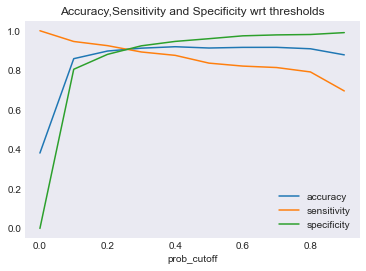

In [137]:
cutoff_df.plot.line(x='prob_cutoff', y=['accuracy','sensitivity','specificity'])
plt.title("Accuracy,Sensitivity and Specificity wrt thresholds")
plt.show()

In [138]:
# From the curve above, 0.3 is the optimum point to take it as a cutoff probability.

y_train_pred_final['Predicted'] = y_train_pred_final.Conversion_probs.map( lambda x: 1 if x > 0.3 else 0)

In [139]:
y_train_pred_final.drop([0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9], axis = 1,inplace = True)

In [140]:
y_train_pred_final.head()

,Lead ID,Converted,Conversion_probs,Predicted
0,1871,0,0.002016,0
1,6795,0,0.106854,0
2,3516,0,0.002369,0
3,8105,0,0.178540,0
4,3934,0,0.053834,0


In [141]:
y_train_pred_final["Lead Score"] = round(y_train_pred_final["Conversion_probs"]*100)

In [142]:
y_train_pred_final.head()

,Lead ID,Converted,Conversion_probs,Predicted,Lead Score
0,1871,0,0.002016,0,0.0
1,6795,0,0.106854,0,11.0
2,3516,0,0.002369,0,0.0
3,8105,0,0.178540,0,18.0
4,3934,0,0.053834,0,5.0


In [143]:
y_train_pred_final.sort_values(by = "Lead Score",ascending = False).head()

,Lead ID,Converted,Conversion_probs,Predicted,Lead Score
3437,2286,1,0.996985,1,100.0
4003,7125,1,0.996320,1,100.0
6254,4047,1,0.998087,1,100.0
3998,3021,1,0.996241,1,100.0
594,353,1,0.995319,1,100.0


In [144]:
# Leads with Conversion probability greater than 80
hot_leads = y_train_pred_final[y_train_pred_final["Lead Score"] > 80.0]

#### Confusion Matrix 

In [145]:
# Confusion Matrix with 0.3 as threshold
cmatrix = confusion_matrix(y_train_pred_final["Converted"], y_train_pred_final["Predicted"])
cmatrix

array([[3697,  305],
       [ 265, 2201]], dtype=int64)

#### Visualizing Confusion Matrix

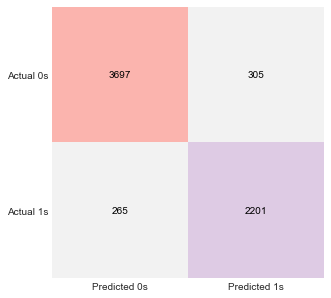

In [146]:
fig, ax = plt.subplots(figsize=(5, 5))
ax.imshow(cmatrix, cmap = "Pastel1_r")
ax.grid(False)
ax.xaxis.set(ticks=(0, 1), ticklabels=('Predicted 0s', 'Predicted 1s'))
ax.yaxis.set(ticks=(0, 1), ticklabels=('Actual 0s', 'Actual 1s'))
ax.set_ylim(1.5, -0.5)
for i in range(2):
    for j in range(2):
        ax.text(j, i, cmatrix[i, j], ha='center', va='center', color='black')
plt.show()

#### Classification Report

In [147]:
# Classification report with threshold as 0.3
print(metrics.classification_report(y_train_pred_final["Converted"], y_train_pred_final["Predicted"]))

              precision    recall  f1-score   support

           0       0.93      0.92      0.93      4002
           1       0.88      0.89      0.89      2466

    accuracy                           0.91      6468
   macro avg       0.91      0.91      0.91      6468
weighted avg       0.91      0.91      0.91      6468



#### Precision - Recall Curve

In [148]:
p, r, thresholds = metrics.precision_recall_curve(y_train_pred_final.Converted, y_train_pred_final.Conversion_probs)

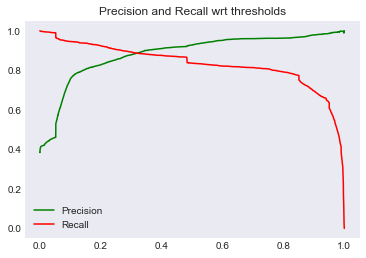

In [149]:
plt.plot(thresholds, p[:-1], "g-", label = "Precision")
plt.plot(thresholds, r[:-1], "r-", label = "Recall")
plt.title("Precision and Recall wrt thresholds")
plt.legend()
plt.show()

#### Precision

In [150]:
metrics.precision_score(y_train_pred_final.Converted,y_train_pred_final.Predicted)

0.87829209896249

#### Recall

In [151]:
print(metrics.recall_score(y_train_pred_final.Converted, y_train_pred_final.Predicted))

0.8925385239253852


In [152]:
TN = cmatrix[0,0] # True Negatives
FP = cmatrix[0,1] # False Positives
FN = cmatrix[1,0] # False Negatives
TP = cmatrix[1,1] # True Positives

#### Specificity

In [153]:
# Specificity of Logistic regression model
TN / float(TN + FP)

0.9237881059470265

### Making predictions on test dataset

#### Feature Scaling test data

In [154]:
num_cols = ["TotalVisits","Total Time Spent on Website", "Page Views Per Visit"]


df_test[num_cols] = scaler.transform(df_test[num_cols])

In [155]:
y_test = df_test.pop("Converted")
X_test = df_test

In [156]:
# Listing the final columns from train dataset
cols = X_train.columns

In [157]:
X_test = X_test[cols]

In [158]:
# Adding constant on test dataset
X_test_sm = sm.add_constant(X_test)

In [159]:
# Predicting y_test
y_test_pred = res.predict(X_test_sm)

In [160]:
y_test_pred.values[:10]

array([0.81420968, 0.99685366, 0.95512564, 0.05383415, 0.95060138,
       0.99584392, 0.96407738, 0.89593366, 0.08774207, 0.99174959])

In [161]:
# Coverting it to dataframe
y_test_pred_df = pd.DataFrame()
y_test_pred_df["Lead ID"] = y_test_pred.index
y_test_pred_df["Conversion Probs"] = y_test_pred.values

In [162]:
y_test_pred_df.head()

,Lead ID,Conversion Probs
0,4269,0.814210
1,2376,0.996854
2,7766,0.955126
3,9199,0.053834
4,4359,0.950601


In [163]:
# Converting y_test to dataframe
y_test_df = pd.DataFrame(y_test)

In [164]:
y_test_df.reset_index(inplace = True)
y_test_df = y_test_df.rename(columns = {"index":"Lead ID"})

In [165]:
y_test_df.head()

,Lead ID,Converted
0,4269,1
1,2376,1
2,7766,1
3,9199,0
4,4359,1


In [166]:
# Append y_test_df and y_test_pred_df
y_test_pred_final = y_test_df.merge(y_test_pred_df,on = "Lead ID")

In [167]:
# Renaming column 
y_test_pred_final = y_test_pred_final.rename(columns = {0 : 'Conversion_Prob'})
y_test_pred_final.head()

,Lead ID,Converted,Conversion Probs
0,4269,1,0.814210
1,2376,1,0.996854
2,7766,1,0.955126
3,9199,0,0.053834
4,4359,1,0.950601


In [168]:
# Making prediction using cut off 0.3
y_test_pred_final['Predicted'] = y_test_pred_final["Conversion Probs"].map(lambda x: 1 if x > 0.3 else 0)
y_test_pred_final.head()

,Lead ID,Converted,Conversion Probs,Predicted
0,4269,1,0.814210,1
1,2376,1,0.996854,1
2,7766,1,0.955126,1
3,9199,0,0.053834,0
4,4359,1,0.950601,1


In [169]:
y_test_pred_final["Lead Score"] = round(y_test_pred_final["Conversion Probs"]*100)

In [170]:
y_test_pred_final.head()

,Lead ID,Converted,Conversion Probs,Predicted,Lead Score
0,4269,1,0.814210,1,81.0
1,2376,1,0.996854,1,100.0
2,7766,1,0.955126,1,96.0
3,9199,0,0.053834,0,5.0
4,4359,1,0.950601,1,95.0


#### Confusion Matrix of test dataset

In [171]:
cmatrix = confusion_matrix(y_test_pred_final["Converted"], y_test_pred_final["Predicted"])
cmatrix

array([[1533,  144],
       [ 105,  990]], dtype=int64)

#### Visualizing Confusion Matrix

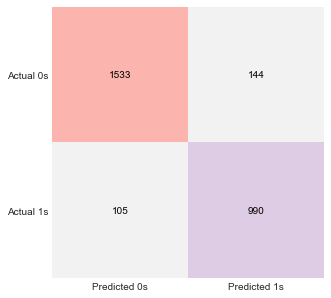

In [172]:
fig, ax = plt.subplots(figsize=(5, 5))
ax.imshow(cmatrix, cmap = "Pastel1_r")
ax.grid(False)
ax.xaxis.set(ticks=(0, 1), ticklabels=('Predicted 0s', 'Predicted 1s'))
ax.yaxis.set(ticks=(0, 1), ticklabels=('Actual 0s', 'Actual 1s'))
ax.set_ylim(1.5, -0.5)
for i in range(2):
    for j in range(2):
        ax.text(j, i, cmatrix[i, j], ha='center', va='center', color='black')
plt.show()

#### Classification report of test dataset

In [173]:
print(metrics.classification_report(y_test_pred_final["Converted"], y_test_pred_final["Predicted"]))

              precision    recall  f1-score   support

           0       0.94      0.91      0.92      1677
           1       0.87      0.90      0.89      1095

    accuracy                           0.91      2772
   macro avg       0.90      0.91      0.91      2772
weighted avg       0.91      0.91      0.91      2772



#### AUC - ROC Curve

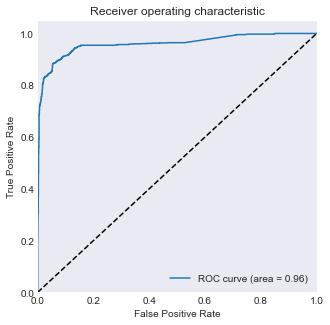

In [174]:
draw_roc(y_test_pred_final.Converted, y_test_pred_final["Conversion Probs"])

#### Precision - Recall Curve

In [175]:
p, r, thresholds = metrics.precision_recall_curve(y_test_pred_final.Converted, y_test_pred_final["Conversion Probs"])

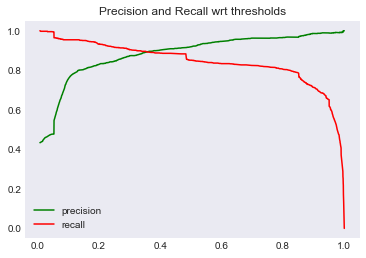

In [176]:
plt.plot(thresholds, p[:-1], "g-", label = "precision")
plt.plot(thresholds, r[:-1], "r-", label = "recall")
plt.title("Precision and Recall wrt thresholds")
plt.legend()
plt.show()

#### Precision

In [177]:
metrics.precision_score(y_test_pred_final.Converted,y_test_pred_final.Predicted)

0.873015873015873

#### Recall

In [178]:
metrics.recall_score(y_test_pred_final.Converted,y_test_pred_final.Predicted)

0.9041095890410958

In [179]:
TN = cmatrix[0,0] # True Negatives
FP = cmatrix[0,1] # False Positives
FN = cmatrix[1,0] # False Negatives
TP = cmatrix[1,1] # True Positives

#### Specificity

In [180]:
# Specificity of Logistic regression model
TN / float(TN + FP)

0.9141323792486583

In [181]:
res.params

const                                              -2.866510
Total Time Spent on Website                         3.467366
Lead Origin_Lead Add Form                           1.213337
Lead Source_Welingak Website                        4.409645
Do Not Email_Yes                                   -1.188825
Tags_Closed by Horizzon                             7.012681
Tags_Lost to EINS                                   5.916031
Tags_Ringing                                       -3.338092
Tags_Will revert after reading the email            4.610345
Tags_switched off                                  -3.494967
Last Notable Activity_Misc_Last Notable Activity    1.224100
Last Notable Activity_SMS Sent                      2.801192
dtype: float64

In [182]:
para = pd.DataFrame()
para['Variables'] = res.params.index
para['Values'] = abs(res.params.values)

In [183]:
para.sort_values(by = 'Values',ascending = False)

,Variables,Values
5,Tags_Closed by Horizzon,7.012681
6,Tags_Lost to EINS,5.916031
8,Tags_Will revert after reading the email,4.610345
3,Lead Source_Welingak Website,4.409645
9,Tags_switched off,3.494967
1,Total Time Spent on Website,3.467366
7,Tags_Ringing,3.338092
0,const,2.866510
11,Last Notable Activity_SMS Sent,2.801192
10,Last Notable Activity_Misc_Last Notable Activity,1.224100


## Summary

### For Training Dataset with threshold of 0.3:

    - Value of Precision     :  0.8782

    - Value of Recall        :  0.8925

    - Value of Specificity   :  0.9237

    - Value of Accuracy      :  0.91

### For Test Dataset :

    - Value of Precision     :  0.8730

    - Value of Recall        :  0.9041

    - Value of Specificity   :  0.9141
    
    - Value of Accuracy      :  0.91

#### It was found that the variables that mattered the most in the potential buyers are (In descending order) :

    1. Tags_Closed by Horizzon
    2. Tags_Lost to EINS
    3. Tags_Will revert after reading the email	
    4. Lead Source_Welingak Website
    5. Tags_switched off
    6. Total Time Spent on Website